<a href="https://colab.research.google.com/github/risav-pyakurel/8th-Sem-Project/blob/main/news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/News.csv', index_col=0)
data = data.drop(["title", "date"], axis=1)
print(data)

                                                    text subject  class
0      Donald Trump just couldn t wish all Americans ...    News    0.0
1      House Intelligence Committee Chairman Devin Nu...    News    0.0
2      On Friday, it was revealed that former Milwauk...    News    0.0
3      On Christmas day, Donald Trump announced that ...    News    0.0
4      Pope Francis used his annual Christmas Day mes...    News    0.0
...                                                  ...     ...    ...
58714  "The Affordable Care Act, the health care refo...  health    0.0
58715  "President Donald Trump said the latest Republ...  health    0.0
58716  "U.S. Rep. Tom Tiffany, a Republican who won a...  health    0.0
58717  Men in Teesside have the same life expectancy ...  health    0.0
58718  "When it comes to federal health care reform, ...  health    0.0

[58719 rows x 3 columns]


In [ ]:
data.isnull().sum()

text       63
subject    63
class      84
dtype: int64

In [ ]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum()

text       0
subject    0
class      0
dtype: int64

In [ ]:
data_cleaned
column_subject = 'subject'
column_data = data_cleaned[column_subject]
print(column_data)


0          News
1          News
2          News
3          News
4          News
          ...  
58714    health
58715    health
58716    health
58717    health
58718    health
Name: subject, Length: 58635, dtype: object


In [ ]:

column_subject = 'subject'
column_data = data_cleaned[column_subject]
print(column_data)
print()
column_stats = data_cleaned[column_subject].describe()
print(column_stats)
print()
unique_data = data_cleaned[column_subject].unique()

0          News
1          News
2          News
3          News
4          News
          ...  
58714    health
58715    health
58716    health
58717    health
58718    health
Name: subject, Length: 58635, dtype: object

count      58635
unique        21
top       health
freq       13736
Name: subject, dtype: object



In [ ]:
datap1= data_cleaned[data_cleaned["subject"].isin(["politics"])]
datap1


,text,subject,class
9050,"According to The Hill, Democrat Senator Bob Ca...",politics,0.0
9051,If we protect every other government building ...,politics,0.0
9052,Ami Horowitz is fantastic! Check out this man ...,politics,0.0
9053,Just one more reminder of why President Trump ...,politics,0.0
9054,Thank goodnesss Jeff Sessions is moving on fin...,politics,0.0
...,...,...,...
15898,The gay mafia has a new corporate Don. This i...,politics,0.0
15899,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,0.0
15900,Nothing like political cronyism to make your s...,politics,0.0
15901,Does anyone really think Hillary Clinton will ...,politics,0.0


In [ ]:
datap2= data_cleaned[data_cleaned["subject"].isin(["politicsNews"])]
datap2

,text,subject,class
23374,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1.0
23375,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1.0
23376,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1.0
23377,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1.0
23378,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1.0
...,...,...,...
34641,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,1.0
34642,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,1.0
34643,"MANCHESTER, N.H. (Reuters) - U.S. Democratic p...",politicsNews,1.0
34644,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,1.0


In [ ]:
data_politicsall1= data_cleaned[data_cleaned["subject"].isin([ "politics", "politicsNews"])]
data_politicsall1

,text,subject,class
9050,"According to The Hill, Democrat Senator Bob Ca...",politics,0.0
9051,If we protect every other government building ...,politics,0.0
9052,Ami Horowitz is fantastic! Check out this man ...,politics,0.0
9053,Just one more reminder of why President Trump ...,politics,0.0
9054,Thank goodnesss Jeff Sessions is moving on fin...,politics,0.0
...,...,...,...
34641,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,1.0
34642,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,1.0
34643,"MANCHESTER, N.H. (Reuters) - U.S. Democratic p...",politicsNews,1.0
34644,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,1.0


In [ ]:
data_politicsall = data_politicsall1 [0:13676]
data_politicsall

,text,subject,class
9050,"According to The Hill, Democrat Senator Bob Ca...",politics,0.0
9051,If we protect every other government building ...,politics,0.0
9052,Ami Horowitz is fantastic! Check out this man ...,politics,0.0
9053,Just one more reminder of why President Trump ...,politics,0.0
9054,Thank goodnesss Jeff Sessions is moving on fin...,politics,0.0
...,...,...,...
30207,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,1.0
30208,WASHINGTON (Reuters) - A bipartisan group of 2...,politicsNews,1.0
30209,WASHINGTON (Reuters) - Legislation expanding t...,politicsNews,1.0
30210,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,1.0


In [ ]:
data_politicsall = data_politicsall1.drop(["subject"], axis = 1)
data_politicsall

,text,class
9050,"According to The Hill, Democrat Senator Bob Ca...",0.0
9051,If we protect every other government building ...,0.0
9052,Ami Horowitz is fantastic! Check out this man ...,0.0
9053,Just one more reminder of why President Trump ...,0.0
9054,Thank goodnesss Jeff Sessions is moving on fin...,0.0
...,...,...
34641,WASHINGTON (Reuters) - President Barack Obama ...,1.0
34642,WASHINGTON (Reuters) - President Barack Obama ...,1.0
34643,"MANCHESTER, N.H. (Reuters) - U.S. Democratic p...",1.0
34644,WASHINGTON (Reuters) - President Barack Obama ...,1.0


In [ ]:
data_healthall1= data_cleaned[data_cleaned["subject"].isin(["health"])]
data_healthall = data_healthall1.drop(["subject"], axis = 1)

In [ ]:
data_healthall

,text,class
44791,“3.8% of Wisconsin’s coronavirus funding has b...,1.0
44792,There’s a “direct correlation” between North C...,1.0
44793,"“There have been five randomized controlled, p...",1.0
44794,“Five veterinary labs have their CLIA certific...,1.0
44795,Say Wisconsin Republican lawmakers have done n...,1.0
...,...,...
58714,"""The Affordable Care Act, the health care refo...",0.0
58715,"""President Donald Trump said the latest Republ...",0.0
58716,"""U.S. Rep. Tom Tiffany, a Republican who won a...",0.0
58717,Men in Teesside have the same life expectancy ...,0.0


In [ ]:

data_politicsall = data_politicsall.sample(frac=1)
data_politicsall.reset_index(inplace=True)
data_politicsall.drop(["index"], axis=1, inplace=True)

In [ ]:
data_healthall = data_healthall.sample(frac=1)
data_healthall.reset_index(inplace=True)
data_healthall.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

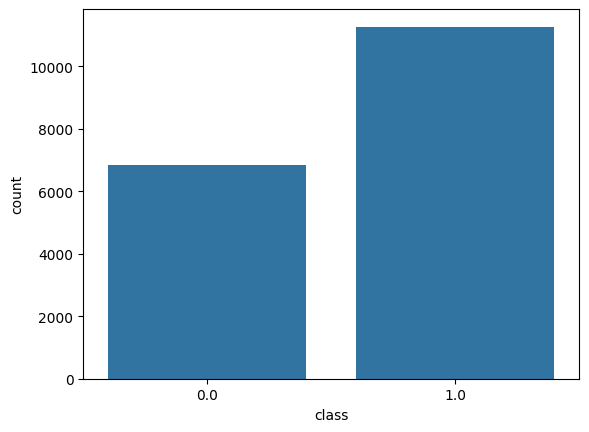

In [ ]:
sns.countplot(data=data_politicsall,
              x='class',
              order=data['class'].value_counts().index)

In [ ]:
data = data_politicsall
data_politicsall


,text,class
0,"WASHINGTON (Reuters) - U.S. lawmakers, alarmed...",1.0
1,Somebody needs to point out to this incompeten...,0.0
2,NEW YORK/SAN FRANCISCO (Reuters) - Even if Pre...,1.0
3,"WINSTON-SALEM, N.C. (Reuters) - The mayor of C...",1.0
4,We have to agree that this one is actually pre...,0.0
...,...,...
18105,WASHINGTON (Reuters) - President Donald Trump ...,1.0
18106,(Reuters) - Republican U.S. presidential candi...,1.0
18107,Wow! If you heard Glen Dogherty s sister tonig...,0.0
18108,(Reuters) - A proposal to raise California’s m...,1.0


In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from tqdm import tqdm


[nltk_data] Downloading package punkt to /home/risav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/risav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text_data):  # Fungsi ini akan melakukan pra-proses seluruh data yang diberikan sebagai input.
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 18110/18110 [08:30<00:00, 35.46it/s]


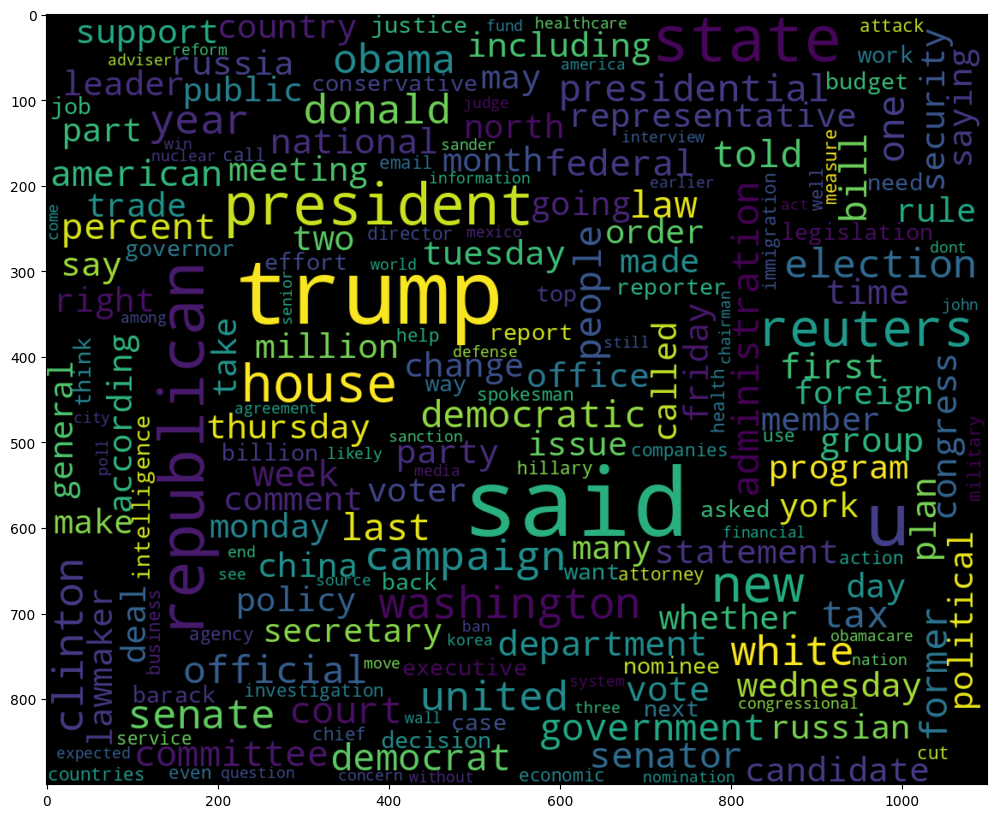

In [ ]:
#For Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1100,
                      height=900,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('on')
plt.show()

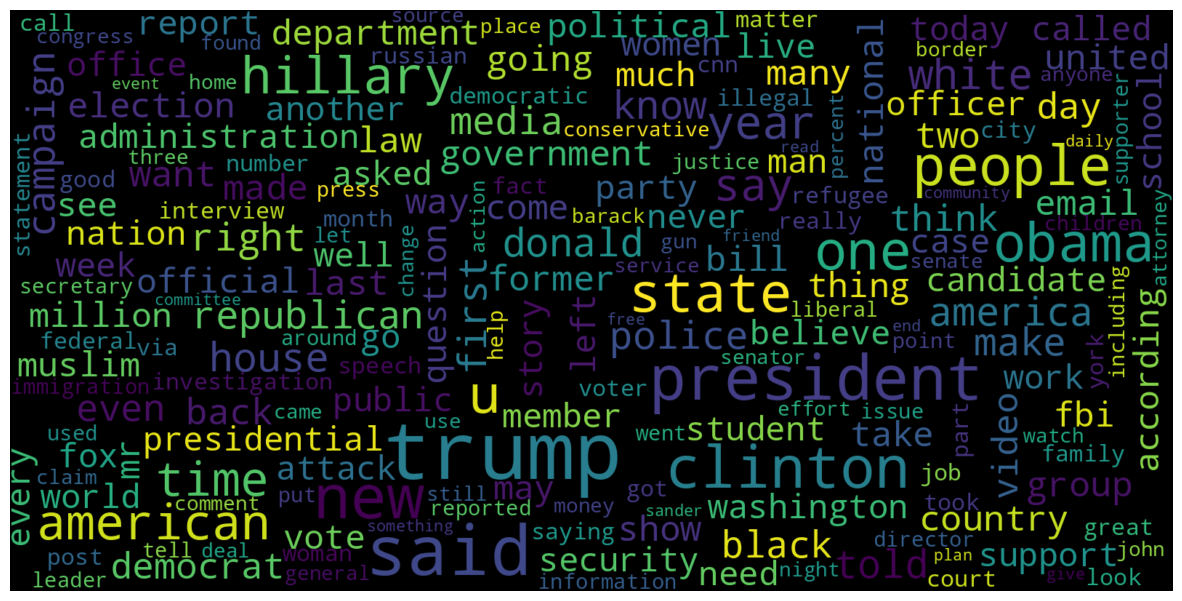

In [ ]:
#For Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str)) # class 0 = fake
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

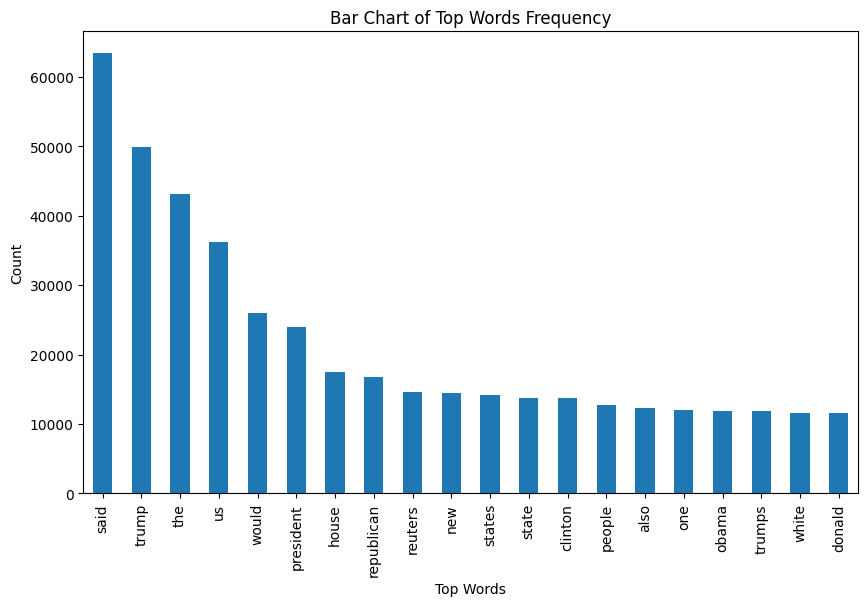

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

print(accuracy_score(y_train, modelLR.predict(x_train)))
print(accuracy_score(y_test, modelLR.predict(x_test)))


0.9874098070976293
0.978577738515901


In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDCT = DecisionTreeClassifier()
modelDCT.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, modelDCT.predict(x_train)))
print(accuracy_score(y_test, modelDCT.predict(x_test)))

0.9999263731409218
0.9944787985865724


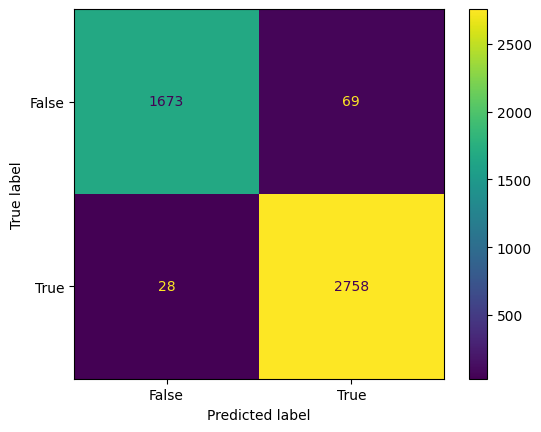

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, modelLR.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

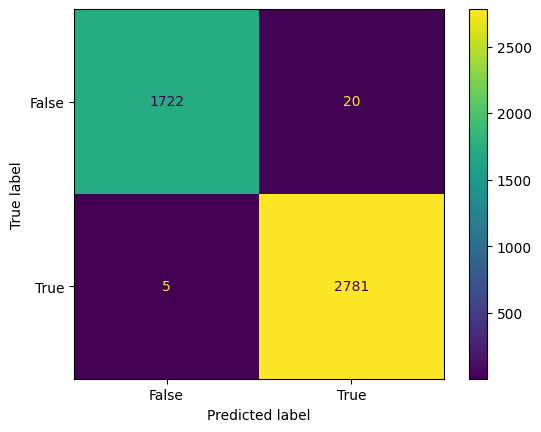

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, modelDCT.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
X_test = data_healthall['text']
Y_test = data_healthall['class']

In [ ]:
X_test = vectorization.transform(X_test)

In [ ]:
print(accuracy_score(Y_test, modelLR.predict(X_test)))

0.7508008153756552


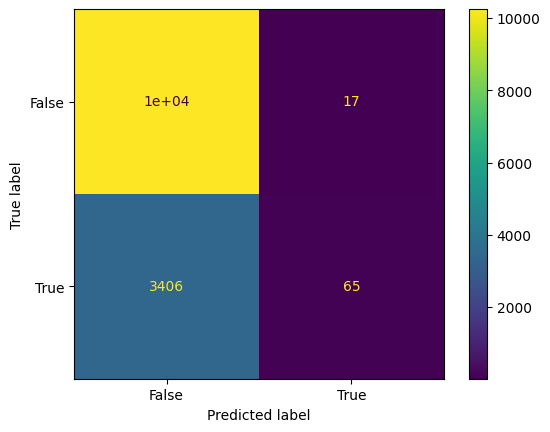

In [ ]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, modelLR.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(accuracy_score(Y_test, modelDCT.predict(X_test)))

0.7521112405358182


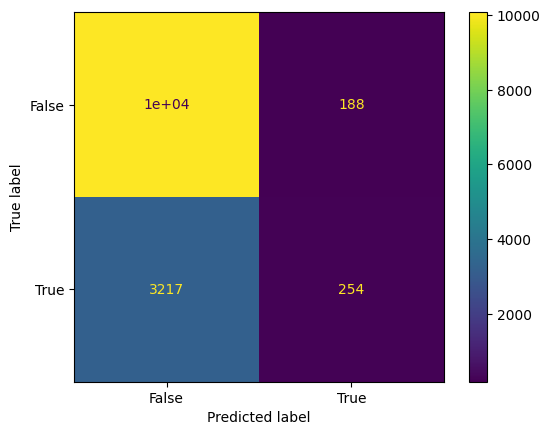

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, modelDCT.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
# After fitting the models, let's use the Decision Tree model (modelDCT) or Logistic Regression (modelLR)
# Let's use modelLR for the prediction example.

input = ["Post about a video claims that it is a protest against confination in the town"]

# Transform input using the same vectorizer
input_data = vectorization.transform(input)

# Predict using the Logistic Regression model (modelLR)
prediction = modelLR.predict(input_data)

# Output the prediction
print(prediction)

# Determine if it's real or fake news based on the model's prediction
if prediction[0] == 1:
    print('Real news')
else:
    print('Fake news')


[0.]
Fake news
